## Crank-Nicosol method on schrodinger equation

In [65]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate
from scipy import sparse
from scipy.sparse.linalg import eigsh
from scipy.sparse.linalg import eigs



ModuleNotFoundError: No module named 'Time_dependent_schrodinger'

In [4]:
# system parameters 
N = 101
# positive length
L = 10
# grid
x,dx = np.linspace(0,L, N , retstep= True)
# time parameters
T = 0.0001
Nt = 10000
dt = 1e-5

In [5]:
# initial wave function generator
def gen_gaussian(x,x0,sigma, p0):
    A = (1 / (2 * np.pi * sigma**2))**(0.25)
    B = np.exp((-(x-x0)**2) / ((4 * sigma)**2))
    C = np.exp(1j*p0*x)
    return A * B * C

In [15]:
# defining potential
def V_free_particle(x):
    return x * 0 

In [50]:
# defining alpha
alpha = (1j * dt) / (4 * (dx**2))

# defining diagonal a and b
a = (1 + (2 * alpha))
b = (1 - (2 * alpha))

'''
dia = np.ones([N])
diaa = np.array([dia * -1 , 2 * dia, dia * -1])
dia_potential = sparse.diags(V0)
M = sparse.spdiags(diaa, np.array([-1,0,1]),N,N) + dia_potential
'''


# constant matrix :-> MA, MM
def constant_matrix(V):
    dia = np.ones([N])
    dia_A = np.array([dia * -alpha , dia *a, dia * -alpha])
    V0= sparse.diags(-1j * dt *V)
    dia_M = np.array([dia * alpha , dia * b , dia * alpha])
    MA = sparse.spdiags(dia_A,np.array([-1,0,1]),N,N)
    MM = sparse.spdiags(dia_M,np.array([-1,0,1]),N,N)  + V0
    return MA ,MM

def CCM():
    dia = np.ones([N])
    dia_A = np.array([dia * -alpha , dia *a, dia * -alpha])
    MA = sparse.spdiags(dia_A,np.array([-1,0,1]),N,N)
    return MA

def CM(V):
    dia = np.ones([N])
    V0= sparse.diags(-1j * dt *V)
    dia_M = np.array([dia * alpha , dia * b , dia * alpha])
    MM = sparse.spdiags(dia_M,np.array([-1,0,1]),N,N) + V0
    return MM


In [21]:
V = V_free_particle(x)

In [55]:
MA , MM = constant_matrix(V)

C:\Users\Windows10\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


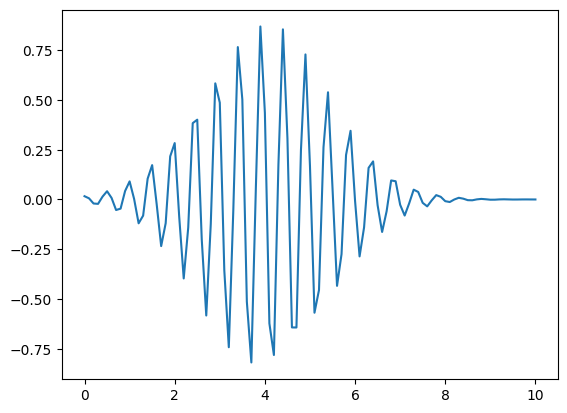

In [57]:
y = gen_gaussian(x,x0 = 4 , sigma = 1/2, p0 = 50)

plt.plot(x, y)